In [ ]:
pip install mglearn

In [ ]:
#Se define las librerias a utilizar
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd #procesamiento de archivos
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  #matrix de confusion
from sklearn import preprocessing
from keras import optimizers
from sklearn.metrics import classification_report
from sklearn.preprocessing import minmax_scale

In [ ]:
def leerData(ruta):
    df = pd.read_csv(ruta)
    return df

def clasificadorSVM(kernel, X,y):
    cls=SVC(kernel=kernel,gamma=10)
    cls.fit(X,y)
    cls.score(X,y)
    return cls

def resultadosSVM(cls, X, y):
    score = cls.score(X, y)
    return score

def predecirSVM(cls, X, y):
    yPred = cls.predict(X)
    matrixConf = confusion_matrix(y, yPred)
    report = classification_report(y, yPred)
    return matrixConf, report

In [ ]:
#Leer Data
#https://www.kaggle.com/ronitf/heart-disease-uci
dataframe=leerData('/content/heart.csv')

In [ ]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Verificamos balanceo de Datos
frecuencia = pd.value_counts(dataframe.target).to_frame().reset_index()
frecuencia.rename(columns={"index":"Ataque","Ataque":"Frecuencia"})

,Ataque,target
0,1,165
1,0,138


In [ ]:
#Información sobre el Dataset
print(f'Número de Datos: {dataframe.shape[0]}, {dataframe.shape[1] - 1} variables 1 variable dependiente.')
print(dataframe.info())

#Verificación de no nulos
dataframe.isnull().sum()

Número de Datos: 303, 13 variables 1 variable dependiente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


<function matplotlib.pyplot.show>

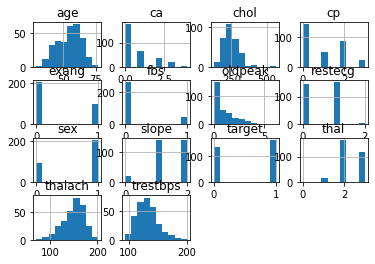

In [ ]:
#Histogramas
print(dataframe.describe())
dataframe.hist()
plt.show

In [ ]:
#Observamos cuantos valores distintos tiene cada atributo
print("Age: ",sorted(dataframe.age.unique()))
print("Sex: ", dataframe.sex.unique())
print("Cp: ", sorted(dataframe.cp.unique()))
print("Trest: ", sorted(dataframe.trestbps.unique()))
print("Chol: ", sorted(dataframe.chol.unique()))
print("fbs: ", sorted(dataframe.fbs.unique()))
print("restecg: ", sorted(dataframe.restecg.unique()))
print("thalach: ", sorted(dataframe.thalach.unique()))
print("exang: ", sorted(dataframe.exang.unique()))
print("oldpeak: ", sorted(dataframe.oldpeak.unique()))
print("slope: ", sorted(dataframe.slope.unique()))
print("ca: ", sorted(dataframe.ca.unique()))
print("thal: ", sorted(dataframe.thal.unique()))
print("target: ", sorted(dataframe.target.unique()))

Age:  [29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
Sex:  [1 0]
Cp:  [0, 1, 2, 3]
Trest:  [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]
Chol:  [126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 281

In [ ]:
#Cambio de variables de categoricas a numericas
nominal_features = ['sex','fbs','exang'] #sex1: 1=Male, 0=Female ; fbs1; 1:Mayor a 120mg/ml', 0= menor ; exang: 1=Angina inducida por ejercicio, 0= no
nominal_features2 = ['cp','restecg', 'slope','ca' ,'thal']
dataarr= pd.get_dummies(dataframe.drop(['target'], axis = 1),columns = nominal_features, drop_first=True)
dataarr2= pd.get_dummies(dataarr,columns = nominal_features2)
dataarr2.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,fbs_1,exang_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
#Creamos X y Y
x = dataarr2
y = dataframe['target']

**ESTANDARIZACIÓN**

In [ ]:
#Estandarizamos los datos
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Se ejecuta el clafificador para generar el modelo
cls0=clasificadorSVM("linear",x,y) #Lineal
cls1=clasificadorSVM("poly",x,y) #Poly
cls2=clasificadorSVM("rbf",x,y) #rbf

In [ ]:
#Se obtiene y se imprime medidas de Rendimiento
print('Clasificador Lineal')
score_Train=resultadosSVM(cls0,X_train,y_train)
print(round(score_Train,6))
score_Test=resultadosSVM(cls0,X_test,y_test)
print(round(score_Test,6))
print('Clasificador Poly')
score_Train1=resultadosSVM(cls1,X_train,y_train)
print(round(score_Train1,6))
score_Test1=resultadosSVM(cls1,X_test,y_test)
print(round(score_Test1,6))
print('Clasificador Rbf')
score_Train2=resultadosSVM(cls2,X_train,y_train)
print(round(score_Train2,6))
score_Test2=resultadosSVM(cls2,X_test,y_test)
print(round(score_Test2,6))

Clasificador Lineal
0.877358
0.868132
Clasificador Poly
1.0
1.0
Clasificador Rbf
1.0
1.0


In [ ]:
#Se obtiene y se imprime la matrices de confusion
print('Clasificador Lineal')
matrix_conf, report =predecirSVM(cls0,X_train,y_train)
print(matrix_conf)
print(report)
matrix_conf, report =predecirSVM(cls0,X_test,y_test)
print(matrix_conf)
print(report)
print('Clasificador Poly')
matrix_conf1, report1 =predecirSVM(cls1,X_train,y_train)
print(matrix_conf1)
print(report1)
matrix_conf1, report1 =predecirSVM(cls1,X_test,y_test)
print(matrix_conf1)
print(report1)
print('Clasificador RBF')
matrix_conf2, report2 =predecirSVM(cls2,X_train,y_train)
print(matrix_conf2)
print(report2)
matrix_conf2, report2 =predecirSVM(cls2,X_test,y_test)
print(matrix_conf2)
print(report2)

Clasificador Lineal
[[ 79  18]
 [  8 107]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        97
           1       0.86      0.93      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.88       212
weighted avg       0.88      0.88      0.88       212

[[34  7]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91

Clasificador Poly
[[ 97   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00  

In [ ]:
print('Clasificador Lineal')
valPredict_train=cls0.predict(X_train).round()
confusion_matrix_train=confusion_matrix(y_train,valPredict_train)
valPredict_test=cls0.predict(X_test).round()
confusion_matrix_test=confusion_matrix(y_test,valPredict_test)
print('Clasificador Poly')
valPredict_train1=cls1.predict(X_train).round()
confusion_matrix_train1=confusion_matrix(y_train,valPredict_train1)
valPredict_test1=cls1.predict(X_test).round()
confusion_matrix_test1=confusion_matrix(y_test,valPredict_test1)
print('Clasificador RBF')
valPredict_train2=cls2.predict(X_train).round()
confusion_matrix_train2=confusion_matrix(y_train,valPredict_train2)
valPredict_test2=cls2.predict(X_test).round()
confusion_matrix_test2=confusion_matrix(y_test,valPredict_test2)

Clasificador Lineal
Clasificador Poly
Clasificador RBF


In [ ]:
print('Clasificador Lineal')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train)
print("==============confusion_matrix_test================")
print(confusion_matrix_test)
print('Clasificador Poly')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train1)
print("==============confusion_matrix_test================")
print(confusion_matrix_test1)
print('Clasificador RBF')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train2)
print("==============confusion_matrix_test================")
print(confusion_matrix_test2)

Clasificador Lineal
===============confusion_matrix_train===============
[[ 79  18]
 [  8 107]]
==============confusion_matrix_test================
[[34  7]
 [ 5 45]]
Clasificador Poly
===============confusion_matrix_train===============
[[ 97   0]
 [  0 115]]
==============confusion_matrix_test================
[[41  0]
 [ 0 50]]
Clasificador RBF
===============confusion_matrix_train===============
[[ 97   0]
 [  0 115]]
==============confusion_matrix_test================
[[41  0]
 [ 0 50]]


In [ ]:
print("CONCLUSIONES:")
print('Clasificador Lineal')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train,6))
print("-Testeo: ",round(score_Test,6))
print('Clasificador Poly')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train1,6))
print("-Testeo: ",round(score_Test1,6))
print('Clasificador RBF')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train2,6))
print("-Testeo: ",round(score_Test2,6))


CONCLUSIONES:
Clasificador Lineal
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  0.877358
-Testeo:  0.868132
Clasificador Poly
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  1.0
-Testeo:  1.0
Clasificador RBF
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  1.0
-Testeo:  1.0


**Normalización**

In [ ]:
#Estandarizamos los datos
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [ ]:
#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Se ejecuta el clafificador para generar el modelo
cls0=clasificadorSVM("linear",x,y) #Lineal
cls1=clasificadorSVM("poly",x,y) #Poly
cls2=clasificadorSVM("rbf",x,y) #rbf

In [ ]:
#Se obtiene y se imprime medidas de Rendimiento
print('Clasificador Lineal')
score_Train=resultadosSVM(cls0,X_train,y_train)
print(round(score_Train,6))
score_Test=resultadosSVM(cls0,X_test,y_test)
print(round(score_Test,6))
print('Clasificador Poly')
score_Train1=resultadosSVM(cls1,X_train,y_train)
print(round(score_Train1,6))
score_Test1=resultadosSVM(cls1,X_test,y_test)
print(round(score_Test1,6))
print('Clasificador Rbf')
score_Train2=resultadosSVM(cls2,X_train,y_train)
print(round(score_Train2,6))
score_Test2=resultadosSVM(cls2,X_test,y_test)
print(round(score_Test2,6))

Clasificador Lineal
0.872642
0.879121
Clasificador Poly
1.0
1.0
Clasificador Rbf
0.995283
1.0


In [ ]:
#Se obtiene y se imprime la matrices de confusion
print('Clasificador Lineal')
matrix_conf, report =predecirSVM(cls0,X_train,y_train)
print(matrix_conf)
print(report)
matrix_conf, report =predecirSVM(cls0,X_test,y_test)
print(matrix_conf)
print(report)
print('Clasificador Poly')
matrix_conf1, report1 =predecirSVM(cls1,X_train,y_train)
print(matrix_conf1)
print(report1)
matrix_conf1, report1 =predecirSVM(cls1,X_test,y_test)
print(matrix_conf1)
print(report1)
print('Clasificador RBF')
matrix_conf2, report2 =predecirSVM(cls2,X_train,y_train)
print(matrix_conf2)
print(report2)
matrix_conf2, report2 =predecirSVM(cls2,X_test,y_test)
print(matrix_conf2)
print(report2)

Clasificador Lineal
[[ 79  18]
 [  9 106]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        97
           1       0.85      0.92      0.89       115

    accuracy                           0.87       212
   macro avg       0.88      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212

[[34  7]
 [ 4 46]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.87      0.92      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91

Clasificador Poly
[[ 97   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00  

In [ ]:
print('Clasificador Lineal')
valPredict_train=cls0.predict(X_train).round()
confusion_matrix_train=confusion_matrix(y_train,valPredict_train)
valPredict_test=cls0.predict(X_test).round()
confusion_matrix_test=confusion_matrix(y_test,valPredict_test)
print('Clasificador Poly')
valPredict_train1=cls1.predict(X_train).round()
confusion_matrix_train1=confusion_matrix(y_train,valPredict_train1)
valPredict_test1=cls1.predict(X_test).round()
confusion_matrix_test1=confusion_matrix(y_test,valPredict_test1)
print('Clasificador RBF')
valPredict_train2=cls2.predict(X_train).round()
confusion_matrix_train2=confusion_matrix(y_train,valPredict_train2)
valPredict_test2=cls2.predict(X_test).round()
confusion_matrix_test2=confusion_matrix(y_test,valPredict_test2)

Clasificador Lineal
Clasificador Poly
Clasificador RBF


In [ ]:
print('Clasificador Lineal')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train)
print("==============confusion_matrix_test================")
print(confusion_matrix_test)
print('Clasificador Poly')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train1)
print("==============confusion_matrix_test================")
print(confusion_matrix_test1)
print('Clasificador RBF')
print("===============confusion_matrix_train===============")
print(confusion_matrix_train2)
print("==============confusion_matrix_test================")
print(confusion_matrix_test2)

Clasificador Lineal
===============confusion_matrix_train===============
[[ 79  18]
 [  9 106]]
==============confusion_matrix_test================
[[34  7]
 [ 4 46]]
Clasificador Poly
===============confusion_matrix_train===============
[[ 97   0]
 [  0 115]]
==============confusion_matrix_test================
[[41  0]
 [ 0 50]]
Clasificador RBF
===============confusion_matrix_train===============
[[ 96   1]
 [  0 115]]
==============confusion_matrix_test================
[[41  0]
 [ 0 50]]


In [ ]:
print("CONCLUSIONES:")
print('Clasificador Lineal')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train,6))
print("-Testeo: ",round(score_Test,6))
print('Clasificador Poly')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train1,6))
print("-Testeo: ",round(score_Test1,6))
print('Clasificador RBF')
print("Los resultados de la evaluacion del modelo son:")
print("-Entrenamiento: ",round(score_Train2,6))
print("-Testeo: ",round(score_Test2,6))


CONCLUSIONES:
Clasificador Lineal
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  0.872642
-Testeo:  0.879121
Clasificador Poly
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  1.0
-Testeo:  1.0
Clasificador RBF
Los resultados de la evaluacion del modelo son:
-Entrenamiento:  0.995283
-Testeo:  1.0


Luego de haber configurado varios tipos de redes neuronales, los mejores resultados han dado el modelo entrenado con SVM con KERNEL='Poly' , ya sea Estandarizando o Normalizando los datos